##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 4 Report

## Group Members: Akash Shetty and Helen Lai
## Group Name for Leaderboard: Asians

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st 

%matplotlib inline

### Exercise 1: Construct Dictionaries from Data

<img src="lab4_exercise1.png" width="1000">

In [2]:
# converts csv file to dictionary 
def convert_csv_to_dict(file_path):
    
    new_csv = pd.read_csv(file_path) #reads csv file
    new_numpy = new_csv.to_numpy() # converts csv file numpy 
    headers = new_csv.columns.values.tolist()# creates list of 
    dict_object = {'Filename': file_path}
    # loop through each column title of csv file
    for i in range(len(headers)): # for loop to make the dictionary object equal a array 
        dict_object[headers[i]] = new_numpy[:,i]
        
    return dict_object

In [3]:
TSLA_dict = convert_csv_to_dict('TSLA.csv')

In [4]:
# Navigate to keys corresponding to 2nd and 4th columns (Open and Low prices) of TSLA.csv, 
# Print first 10 elements of each key.

TSLA_column2 = "Open"
TSLA_column4 = "Low"
print(TSLA_dict[TSLA_column2][:10])
print(TSLA_dict[TSLA_column4][:10])

[19.0 25.790001 25.0 23.0 20.0 16.4 16.139999 17.58 17.950001 17.389999]
[17.540001 23.299999 20.27 18.709999 15.83 14.98 15.57 16.549999 17.0 16.9]


In [5]:
diabetes_dict = convert_csv_to_dict('diabetes.csv')

In [6]:
# Navigate to keys corresponding to 2nd and 4th columns (Glucose and SkinThickness) of diabetes.csv, 
# Print first 10 elements of each key.

diabetes_column2 = "Glucose"
diabetes_column4 = "SkinThickness"
print(diabetes_dict[diabetes_column2][:10])
print(diabetes_dict[diabetes_column4][:10])

[148.  85. 183.  89. 137. 116.  78. 115. 197. 125.]
[35. 29.  0. 23. 35.  0. 32.  0. 45.  0.]


### Exercise 2: Bar graph with confidence intervals

<img src="lab4_exercise2.png" width="1000">

In [7]:
# Load diabetes.csv 
# Split the data into diabetic and non-diabetic

diabetes = pd.read_csv('diabetes.csv')
diabetes_np = diabetes.to_numpy()
diabetic = diabetes_np[:,-1] == 1 # boolean mask for just diabetics
non_diabetic = diabetes_np[:,-1] == 0 # boolean mask for non diabetics

diabetic_np = diabetes_np[diabetic,:] # creates array with just diabetics
non_diabetic_np = diabetes_np[non_diabetic,:] # creats array with just non diabetics




In [8]:
# Extract glucose, blood pressure, and BMI metrics from diabetic and non-diabetic

# non-diabetic metrics
non_diabetic_glucose = non_diabetic_np[:,1]
non_diabetic_bp = non_diabetic_np[:,2]
non_diabetic_bmi = non_diabetic_np[:,5]

# diabetic metrics
diabetic_glucose = diabetic_np[:,1]
diabetic_bp = diabetic_np[:,2]
diabetic_bmi = diabetic_np[:,5]

non_diabetic_list = [non_diabetic_glucose, non_diabetic_bp, non_diabetic_bmi]
diabetic_list = [diabetic_glucose, diabetic_bp, diabetic_bmi]

non_diabetic_bar_labels = ['non_diabetic_glucose', 'non_diabetic_bp', 'non_diabetic_bmi']
diabetic_bar_labels = ['diabetic_glucose', 'diabetic_bp', 'diabetic_bmi']



In [9]:
def produce_bargraph_CI(data_vec_list, conf_level, bar_labels):
    
    for i in range(len(bar_labels)): 
        CI_lower, CI_upper = st.t.interval(conf_level, df = len(data_vec_list[i])-1, loc = np.mean(data_vec_list[i]), scale = st.sem(data_vec_list[i]))# creates upper and lower confidence levels
        err = CI_upper - np.mean(data_vec_list[i])# the error of each bar graph
        plt.bar(bar_labels[i],np.mean(data_vec_list[i]), width = .3, color = 'black', yerr = err, ecolor = 'gray', error_kw = dict(lw = 1, capsize = 30, capthick = 1))# creates the bar graph
    
    # YOUR CODE HERE 
    # THE FUNCTION SHOULD OUTPUT THE PLOT
    # MAKE SURE YOUR LABELS (bar labels, plot titles are large enough)

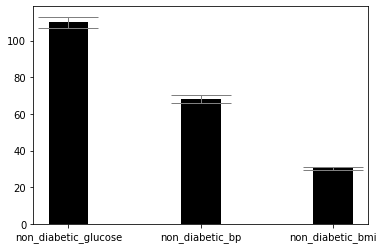

In [10]:
produce_bargraph_CI(data_vec_list = non_diabetic_list, conf_level = 0.99, bar_labels = non_diabetic_bar_labels)

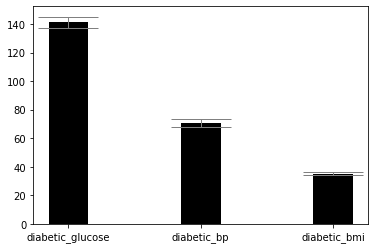

In [11]:
produce_bargraph_CI(data_vec_list = diabetic_list, conf_level = 0.95, bar_labels = diabetic_bar_labels)

### Exercise 3: Rolling Mean/Median Function from Scratch

<img src="lab4_exercise3.png" width="1000">

In [12]:
# Load stock datasets

tesla = pd.read_csv('TSLA.csv') 
tesla_np = tesla.to_numpy()

google = pd.read_csv('GOOGL.csv') 
google_np = google.to_numpy()

dji = pd.read_csv('DJI.csv') 
dji_np = dji.to_numpy()

In [13]:
# Extract closing price for each stock data

tesla_np_closing = tesla_np[:, 4]
google_np_closing = google_np[:, 4]
DJI_np_closing = dji_np[:, 4]

In [125]:
def smooth_data(data_arr, smooth_type, window_size):
    length = len(data_arr) - window_size #creates the length of the data array cant go past last length of window size 
    smoothed_data_arr = np.zeros(length) #empty array for rolling mean values
    for i in range(length):
        if smooth_type == 'mean':
            smoothed_data_arr[i] = np.mean(data_arr[i:i+window_size]) # iterates through data arr taking mean of i to the i+ window size
        elif smooth_type == 'median':
            smoothed_data_arr[i] = np.median(data_arr[i : i+window_size]) # iterates through data arr taking median of i to the i + window size
    
    
    return smoothed_data_arr

In [126]:
# Tesla closing prices, smooth_type = 'mean', window_size = 100
# Note your smoothed data will be shorter than the original

smoothed_tsla_closing  = smooth_data(tesla_np_closing, smooth_type = 'mean', window_size = 100)

Text(0, 0.5, 'Days')

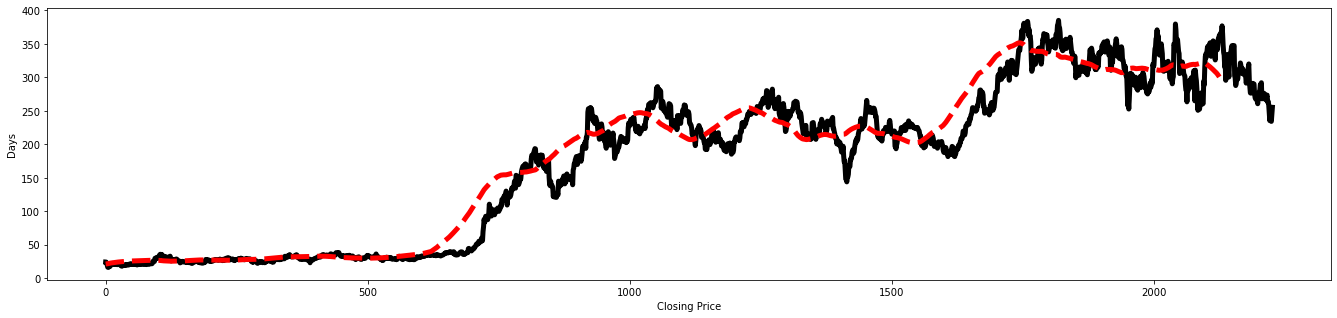

In [127]:
# plot smoothed_tsla_closing on top of tesla_np_closing
fig  = plt.figure(figsize = (23,5))
plt.plot(tesla_np_closing,linewidth = 5, color = 'black')
plt.plot(smoothed_tsla_closing, linewidth = 5, color = 'red', linestyle = 'dashed')
plt.xlabel('Closing Price')
plt.ylabel('Days')
# YOUR CODE HERE

In [128]:
# Google closing prices, smooth_type = 'median', window_size = 150
# Note your smoothed data will be shorter than the original

smoothed_google_closing  = smooth_data(google_np_closing, smooth_type = 'median', window_size = 150)

Text(0, 0.5, 'Days')

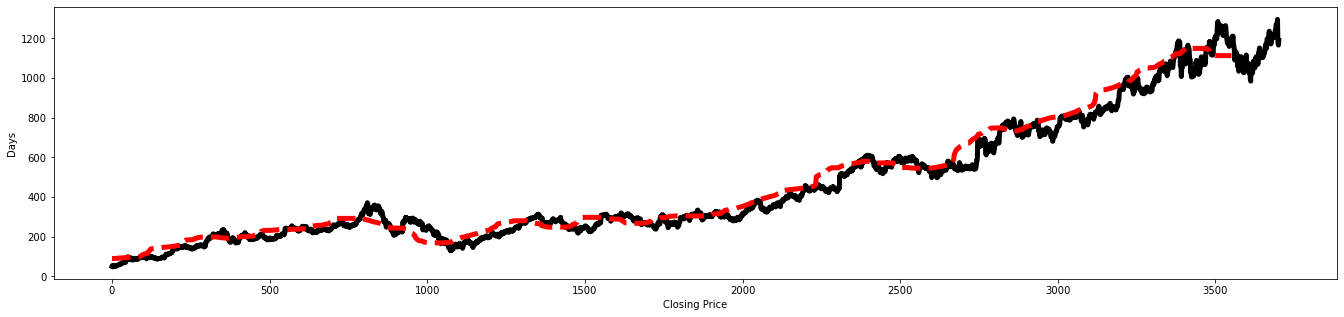

In [129]:
# plot smoothed_google_closing on top of google_np_closing
fig  = plt.figure(figsize = (23,5))
plt.plot(google_np_closing,linewidth = 5, color = 'black')
plt.plot(smoothed_google_closing, linewidth = 5, color = 'red', linestyle = 'dashed')
plt.xlabel('Closing Price')
plt.ylabel('Days')
# YOUR CODE HERE

In [130]:
# Dow Jones Index closing prices, smooth_type = 'mean', window_size = 200
# Note your smoothed data will be shorter than the original

smoothed_dji_closing  = smooth_data(DJI_np_closing, smooth_type = 'mean', window_size = 200)

Text(0, 0.5, 'Days')

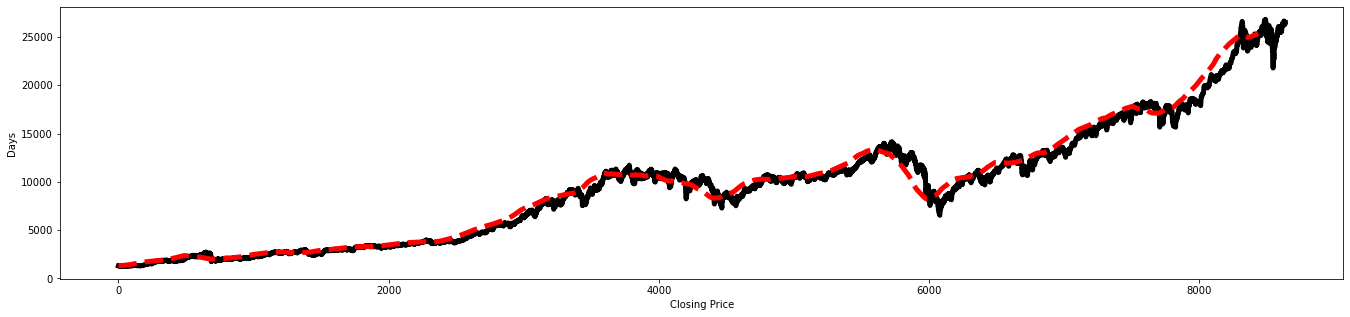

In [131]:
# plot smoothed_dji_closing on top of dji_np_closing
fig  = plt.figure(figsize = (23,5))
plt.plot(DJI_np_closing,linewidth = 5, color = 'black')
plt.plot(smoothed_dji_closing, linewidth = 5, color = 'red', linestyle = 'dashed')
plt.xlabel('Closing Price')
plt.ylabel('Days')
# YOUR CODE HERE

## Extra credit: Code efficiency
### Achieve a runtime speed of < 50ms

In [132]:
timeit -n 1 -r 7 smoothed_google_closing  = smooth_data(google_np_closing, smooth_type = 'median', window_size = 150)

166 ms ± 4.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 4: Ranking Daily Stock Surges/Crashes

<img src="lab4_exercise4.png" width="1000">

In [22]:
def detect_surge_crash(filepath, detect_type, num_output_dates):
    
    dictionary_surge  = convert_csv_to_dict(filepath) # uses out dictionary to csv function to create new dictionary 
    calculation = dictionary_surge['Close']- dictionary_surge['Open'] # gets array of close and open and subtracts them
    dates = dictionary_surge['Date'] # gets the date array of the csv file
    
    if detect_type == 'surge': # if surge then sorts the indexes of highest to lowest of difference of close and open
        crashsurge_calculation = np.argsort(calculation)[::-1]
        price_index = crashsurge_calculation[:num_output_dates] # just the highest values based on our num_ouput_dates
        
    if detect_type == 'crash': # if crash then sorts the indexes of lowers to highest of difference between close and open 
        crashsurge_calculation = np.argsort(calculation)
        price_index= crashsurge_calculation[:num_output_dates]# just the highest values based on our num_ouput_dates
    
    price_change_list = np.zeros(price_index.shape) # zero array for our price change list
    date_list = np.empty(price_index.shape, dtype='U256' ) # string array for our date list
    for i in range(len(price_index)): # iterates through the length of the number of price_indexes
        price_change_list[i] = calculation[price_index[i]] # gets index of price change in our difference array
        date_list[i] = dates[price_index[i]] # return date from index got from date array
    
    
    return date_list, price_change_list

In [23]:
date_list_t, price_change_list_t = detect_surge_crash(filepath = 'TSLA.csv', detect_type = 'surge', num_output_dates = 5)

In [24]:
print(date_list_t, price_change_list_t)

['2018-08-07' '2018-04-04' '2018-10-23' '2018-12-26' '2018-10-26'] [35.730011 34.160003 30.27002  26.089996 22.649994]


In [25]:
date_list_g, price_change_list_g = detect_surge_crash(filepath = 'GOOGL.csv', detect_type = 'crash', num_output_dates = 7)

In [26]:
print(date_list_g, price_change_list_g)

['2018-10-29' '2018-10-24' '2018-03-27' '2018-02-08' '2018-12-04'
 '2018-10-10' '2018-12-21'] [-61.810059 -57.880005 -56.960022 -52.159973 -50.520019 -44.23999
 -40.790039]


## Extra credit: Code efficiency
### Achieve a runtime speed of < 10ms

In [27]:
timeit -n 1 -r 7 date_list_t, price_change_list_t = detect_surge_crash(filepath = 'TSLA.csv', detect_type = 'surge', num_output_dates = 5)

5.57 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 5: Human Debugger

<img src="lab4_exercise5.png" width="1200">

### Faulty function #1 

In [ ]:
def average_data_per_col(arr_2d):
    
    # NOTE FROM YOUR FRIEND PREPARING FOR STARBUCKS SOFTWARE ENGINEER TECH INTERVIEW 
    """  The function takes numpy 2d array as an input, computes mean for each column data, and outputs 1D array 
         with the length equal to the # of columns.
         
         For some reason I keep getting errors.... I need your help to debug the code.
         I need this position so I can get free ice lattes... :(
    
    """
    
    # placeholder for averaged values
    averaged_data = ()
    
    # Loop through each column data to compute mean and append to averaged_data 
    for k in range(len(arr_2d[:, 0])):
        
        averaged_column_data = np.mean(arr_2d[:, k])
        averaged_data.append(averaged_column_data)
        
    # Return numpy array form of the averaged_data
    return np.array(averaged_data)

In [ ]:
# Load diabetes.csv and convert to numpy array

diabetes = pd.read_csv('diabetes.csv')
diabetes_np = diabetes.to_numpy()

In [ ]:
# Run faulty function 1

averaged_diabetic_attributes =  average_data_per_col(diabetes_np)

In [65]:
# YOUR FIXED FUNCTION HERE
# Make sure you comment on your fixes

def average_data_per_col_fixed(arr_2d):
    
    # YOUR CODE HERE
    # averaged data should be an array not a tuple
    averaged_data = []
    # can use this function to compute averages along all columns of the array 
    averaged_data = arr_2d.mean(axis=0)
    
        
    return averaged_data 

In [66]:
# Test your fixed function

averaged_diabetic_attributes =  average_data_per_col_fixed(diabetes_np)

In [67]:
# Compare with correct results

correct_result_func1 = np.load('E5_correct_output_1.npy')

# Should return True if the result is correct
np.sum(np.round(correct_result_func1, 3) == np.round(averaged_diabetic_attributes, 3)) == len(correct_result_func1) 

True

### Faulty function #2

In [50]:
def daily_stock_change_2_normalized_percentage(opening_price_arr, closing_price_arr):
    
    # NOTE FROM YOUR FRIEND WHO INVESTED IN TESLA
    """  I want to write a function which takes 2 1D numpy arrays of each corresponding to opening/closing prices of stock
         and output 1D array of daily stock change in percentages. 
         
         I want the percentages scale to be in a scale such that 1 = 100%, -0.5 = -50%, 1.5 = 150%  etc.
         For example, day 1 opening: $10, day 1 closing: $15, change in scaled percecntage: 0.5.
         
         I am not really getting errors but the numbers don't look right... Can you help me?? :'( 
    
    """
    
    # placeholder for change percentage values
    change_percentages = np.zeros(len(opening_price_arr), dtype = 'int')
    
    # Loop through each opening/closing price to compute the change percentage
    for date_num in range(len(opening_price_arr)):
        
        change_percentages[date_num] = opening_price_arr[date_num] - closing_price_arr[date_num] / opening_price_arr[date_num]
    
    print(opening_price_arr)
    print(closing_price_arr)
    return change_percentages

In [51]:
# Load tsla.csv and convert to numpy array

tesla = pd.read_csv('TSLA.csv') 
tesla_np = tesla.to_numpy()

In [52]:
# Run faulty function 2

change_percentages = daily_stock_change_2_normalized_percentage(tesla_np[:, 1], tesla_np[:, 4])
print(change_percentages)

[19.0 25.790001 25.0 ... 238.850006 245.520004 243.860001]
[23.889999 23.83 21.959999 ... 234.009995 244.100006 255.029999]
[ 0.25736837 -0.07599848 -0.12160004 ... -0.02026381 -0.00578363
  0.04580496]


In [59]:
# YOUR FIXED FUNCTION HERE
# Make sure you comment on your fixes

def daily_stock_change_2_normalized_percentage_fixed(opening_price_arr, closing_price_arr):
    
    
    change_percentages = np.zeros(len(opening_price_arr)) #removed dtype = 'int' so it returns a double
    
    
    for date_num in range(len(opening_price_arr)):
        
        change_percentages[date_num] = (closing_price_arr[date_num] - opening_price_arr[date_num]) / opening_price_arr[date_num]
        # switches closing and opening prices and puts brackets because of order of operations
    
    return change_percentages

In [60]:
# Test your fixed function

change_percentages = daily_stock_change_2_normalized_percentage_fixed(tesla_np[:, 1], tesla_np[:, 4])
print(change_percentages)

[ 0.25736837 -0.07599848 -0.12160004 ... -0.02026381 -0.00578363
  0.04580496]


In [61]:
# Compare with correct results

correct_result_func2 = np.load('E5_correct_output_2.npy')
# Should return True if the result is correct
np.sum(np.round(correct_result_func2, 3) == np.round(change_percentages, 3)) == len(correct_result_func2) 

[ 0.25736837 -0.07599848 -0.12160004 ... -0.02026381 -0.00578363
  0.04580496]


True

### Faulty function #3

In [12]:
def subset_diabetes_by_age(diabetes_data):
    
    # NOTE FROM YOUR FRIEND WHO WORKS AT UW IHME
    """ The function takes diabetes pandas data frame as an input and outputs a subplot of 3 x 1 with three histograms.    
    
        Specifically, I want to divide the diabetes data into three age groups - 
            1. 20 to 40
            2. 40 to 60
            3. 60 to 80
            
        and plot 3 histograms of glucose distribution (50 bins per histogram) in 3 x 1 python subplots.
        
        I seem to be getting error from very beginning even before I divide the dataset....
        My coworkers at IHME prefer R rather than Python... so you are my only hope!  
    
    """
    
    # Extract the age column of the diabetes_data 
    age_column = diabetes_data[:, 8] 
    
    # Construct boolean mask for each age group 
    age_20_40_bool_mask = age_column > 20 + age_column < 40
    age_40_60_bool_mask = age_column > 40 + age_column < 60
    age_60_80_bool_mask = age_column > 60 + age_column < 80
    
    # Get glucose data for each age group via applying the boolean mask for each age group
    age_20_40_glucose = diabetes_data[age_20_40_bool_mask, 2]
    age_40_60_glucose = diabetes_data[age_40_60_bool_mask, 2]
    age_60_80_glucose = diabetes_data[age_60_80_bool_mask, 2]
    
    # Plot the histogram for each age group in 3 x 1 subplot
    fig = plt.figure(figsize=(15,7))
    
    plt.subplot(3,1,1)
    
    plt.hist(age_20_40_glucose, bins = 50)
    plt.title('Age 20 to 40', fontsize = 15)
    
    plt.subplot(3,1,2)
    
    plt.hist(age_40_60_glucose, bins = 50)
    plt.title('Age 40 to 60', fontsize = 15)
    
    plt.subplot(3,1,3)
    
    plt.hist(age_60_80_glucose, bins = 50)
    plt.title('Age 60 to 80', fontsize = 15)
    
    plt.tight_layout()
    
    plt.show()

In [13]:
# Load diabetes.csv as pandas dataframe

diabetes = pd.read_csv('diabetes.csv')

In [14]:
# Run faulty function 3

subset_diabetes_by_age(diabetes_data = diabetes)

TypeError: '(slice(None, None, None), 8)' is an invalid key

In [123]:
# YOUR FIXED FUNCTION HERE
# Make sure you comment on your fixes

def subset_diabetes_by_age_fixed(diabetes_data):
    
    # YOUR CODE HERE
   
    diabetes_np = diabetes_data.to_numpy()# converted to numpy in order to extract array
    age_column = diabetes_np[:, 7] # diabetes column is 7
    
    # Construct boolean mask for each age group 
    age_20_40_bool_mask = (age_column>20)&(age_column<40) # use & as the comparison because they are numpy array
    age_40_60_bool_mask = (age_column>40)&(age_column<60)
    age_60_80_bool_mask = (age_column>60)&(age_column<80)
    
    # Get glucose data for each age group via applying the boolean mask for each age group
    age_20_40_glucose = diabetes_np[age_20_40_bool_mask, 1] # glucose column is 1 not 2
    age_40_60_glucose = diabetes_np[age_40_60_bool_mask, 1]
    age_60_80_glucose = diabetes_np[age_60_80_bool_mask, 1]
    
    # Plot the histogram for each age group in 3 x 1 subplot
    fig = plt.figure(figsize=(15,7))
    
    plt.subplot(3,1,1)
    
    plt.hist(age_20_40_glucose, bins = 50)
    plt.title('Age 20 to 40', fontsize = 15)
    
    plt.subplot(3,1,2)
    
    plt.hist(age_40_60_glucose, bins = 50)
    plt.title('Age 40 to 60', fontsize = 15)
    
    plt.subplot(3,1,3)
    
    plt.hist(age_60_80_glucose, bins = 50)
    plt.title('Age 60 to 80', fontsize = 15)
    
    plt.tight_layout()
    
    plt.show()
    
    
    

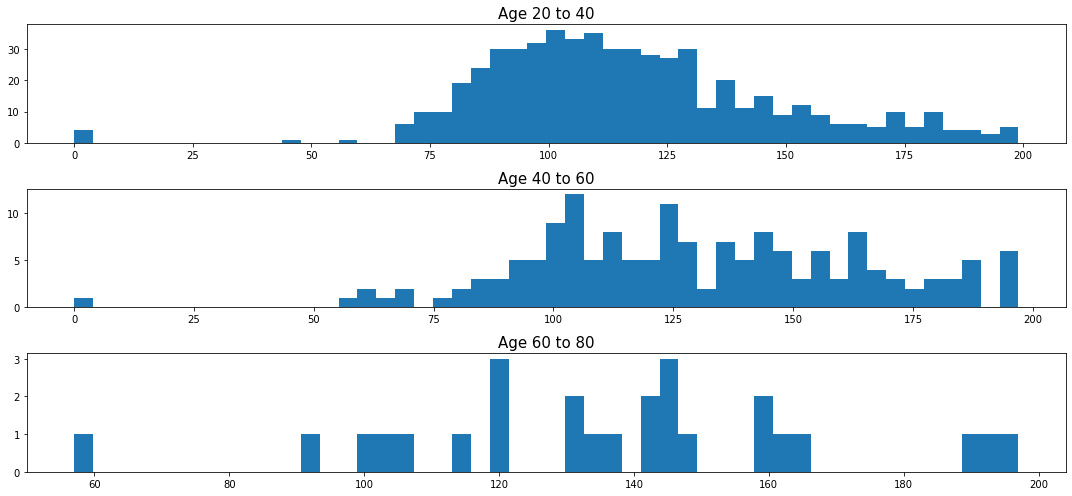

In [124]:
# Test your fixed function
# Compare your plot with the correct plot provided in template folder

subset_diabetes_by_age_fixed(diabetes_data = diabetes)